In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [5]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year-10 , end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [6]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.sample(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2010-07-07,24.320000,23.610001,23.820000,24.299999,79965300.0,19.250080,MICROSOFT
2013-08-27,34.099998,33.150002,33.520000,33.259998,58522300.0,28.766285,MICROSOFT
2016-05-12,51.810001,50.919998,51.200001,51.509998,24102800.0,47.713200,MICROSOFT
2014-05-13,305.600006,300.750000,302.600006,304.640015,3509900.0,304.640015,AMAZON
2019-04-09,1202.290039,1193.079956,1196.000000,1197.250000,876400.0,1197.250000,GOOGLE
2019-08-23,1804.900024,1745.229980,1793.030029,1749.619995,5270800.0,1749.619995,AMAZON
2014-08-15,335.000000,328.320007,334.000000,333.630005,3896700.0,333.630005,AMAZON
2012-11-20,337.734100,331.044159,333.504944,333.734070,4192900.0,333.734070,GOOGLE
2019-01-02,101.750000,98.940002,99.550003,101.120003,35329300.0,99.375191,MICROSOFT


In [7]:
# TIME SERIES

In [9]:
dataset = pd.read_csv("AirPassengers.csv")
#Parse string to datetime type
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Month'])

In [10]:
indexedDataset

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [12]:
from datetime import datetime

C:\Users\adhar\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


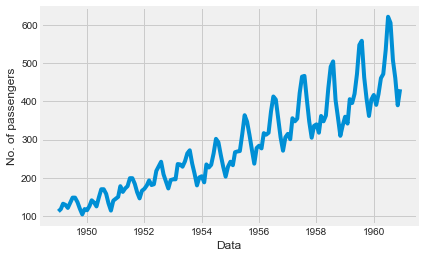

In [14]:
plt.xlabel("Data")
plt.ylabel('No. of passengers')
plt.plot(indexedDataset)

In [15]:
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


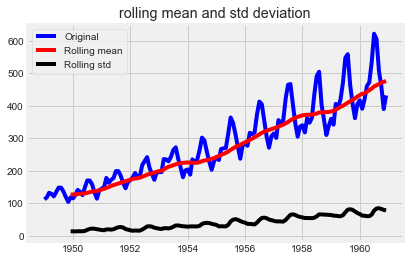

In [16]:
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling mean')
std = plt.plot(rolstd, color = 'black', label='Rolling std')
plt.legend(loc='best')
plt.title("rolling mean and std deviation")
plt.show(block=False)

In [17]:
#DATA IS NOT STATIONARY

In [23]:
# Null hypothesis :- Time-Series is stationary

In [24]:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test')
dftest = adfuller(indexedDataset["#Passengers"], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#lags used', 'no. of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)' %key] = value
    
print(dfoutput)    

Results of Dickey-Fuller Test
Test Statistics               0.815369
p-value                       0.991880
#lags used                   13.000000
no. of observations used    130.000000
Critical Value(1%)           -3.481682
Critical Value(5%)           -2.884042
Critical Value(10%)          -2.578770
dtype: float64


In [25]:
# HERE p-value > 0.5 sp we accept the null hypothesis that the series is non stationary
#Moreover the test statistics > all the critical values so we accept the null hypthesis

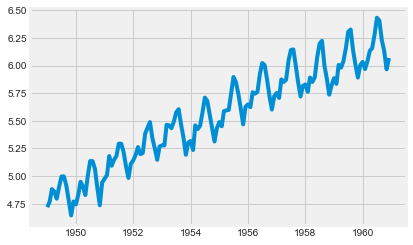

In [27]:
#Estimating Trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

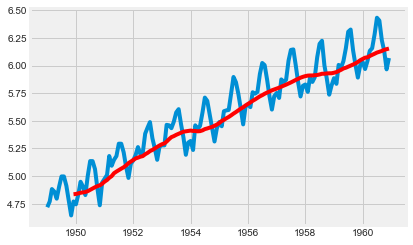

In [28]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingStd = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color = 'red')

In [30]:
datasetLogMinusMA = indexedDataset_logScale - movingAverage
datasetLogMinusMA.head(15)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [37]:
#Removing NaN Values 
datasetLogMinusMA.dropna(inplace=True)
datasetLogMinusMA.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [40]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #determining rolling ststistics
    movingAverage=timeseries.rolling(window=12).mean()
    movingStd= timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color= 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'red', label = 'Rolling mean')
    std =  plt.plot(movingStd, color = 'black', label = 'Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and Standard Deviation')
    plt.show(block=False)
    
    
    #Dickey Fuller Test
    print('Results of Dickey Fuller Test')
    dftest = adfuller(timeseries["#Passengers"], autolag='AIC')
    """autolag{‘AIC’, ‘BIC’, ‘t-stat’, None}
Method to use when automatically determining the lag.
if None, then maxlag lags are used.
if ‘AIC’ (default) or ‘BIC’, then the number of lags is chosen to minimize the corresponding information criterion.
‘t-stat’ based choice of maxlag. Starts with maxlag and drops a lag until the t-statistic on the last lag length is significant using a 5%-sized test."""
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#lags used', 'no. of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)' %key] = value
    print(dfoutput)    

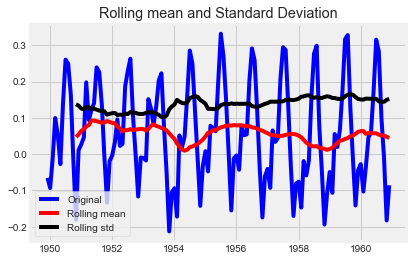

Results of Dickey Fuller Test
Test Statistics              -3.162908
p-value                       0.022235
#lags used                   13.000000
no. of observations used    119.000000
Critical Value(1%)           -3.486535
Critical Value(5%)           -2.886151
Critical Value(10%)          -2.579896
dtype: float64


In [41]:
test_stationarity(datasetLogMinusMA)

In [42]:
#no trends
#adcf result : p value is realtively less
#critical value and test statistics are almost equal

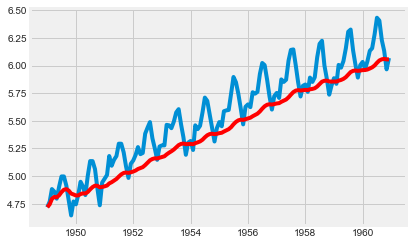

In [43]:
expDecayWeightedAvg = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(expDecayWeightedAvg, color = 'red')

In [44]:
# trend is upward

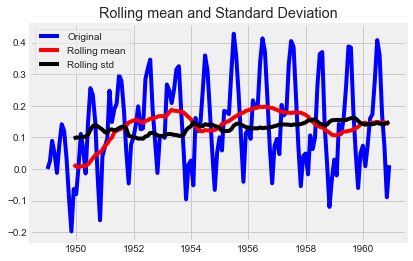

Results of Dickey Fuller Test
Test Statistics              -3.601262
p-value                       0.005737
#lags used                   13.000000
no. of observations used    130.000000
Critical Value(1%)           -3.481682
Critical Value(5%)           -2.884042
Critical Value(10%)          -2.578770
dtype: float64


In [45]:
datasetLogScaleMinusMExpDecayAvg = indexedDataset_logScale -expDecayWeightedAvg
test_stationarity(datasetLogScaleMinusMExpDecayAvg)

In [46]:
#very less p value, TS is stationary

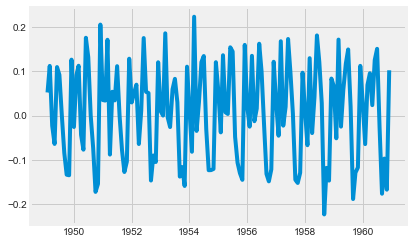

In [47]:
datasetLogDiffShift = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShift)

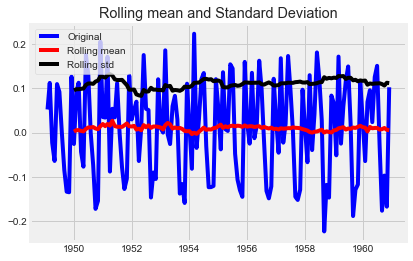

Results of Dickey Fuller Test
Test Statistics              -2.717131
p-value                       0.071121
#lags used                   14.000000
no. of observations used    128.000000
Critical Value(1%)           -3.482501
Critical Value(5%)           -2.884398
Critical Value(10%)          -2.578960
dtype: float64


In [49]:
datasetLogDiffShift.dropna(inplace=True)
test_stationarity(datasetLogDiffShift)

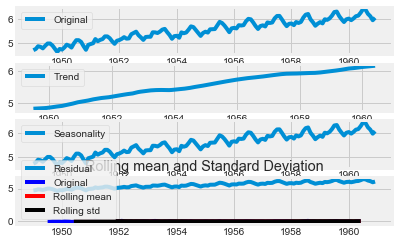

Results of Dickey Fuller Test
Test Statistics            -6.332387e+00
p-value                     2.885059e-08
#lags used                  9.000000e+00
no. of observations used    1.220000e+02
Critical Value(1%)         -3.485122e+00
Critical Value(5%)         -2.885538e+00
Critical Value(10%)        -2.579569e+00
dtype: float64


In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(indexedDataset_logScale, label = 'Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(indexedDataset_logScale, label = 'Residual')
plt.legend(loc='best')

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

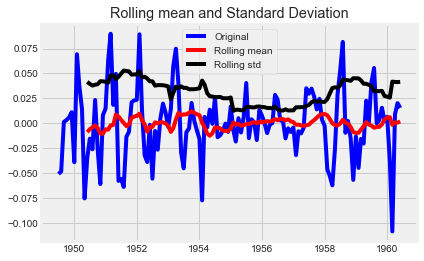

Results of Dickey Fuller Test
Test Statistics            -6.332387e+00
p-value                     2.885059e-08
#lags used                  9.000000e+00
no. of observations used    1.220000e+02
Critical Value(1%)         -3.485122e+00
Critical Value(5%)         -2.885538e+00
Critical Value(10%)        -2.579569e+00
dtype: float64


In [54]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

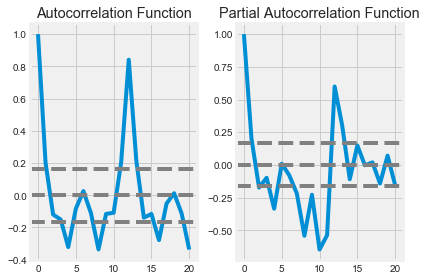

In [56]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(datasetLogDiffShift, nlags=20)
lag_pacf = pacf(datasetLogDiffShift, nlags=20, method='ols')
#ols is Ordinary Least Squared method
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShift)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShift)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\adhar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\adhar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


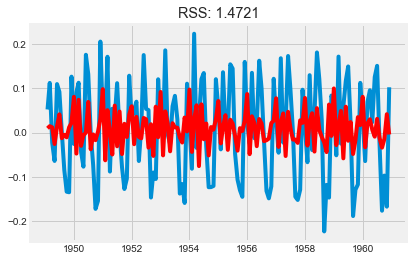

In [71]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(indexedDataset_logScale, order=(0 ,1,2))
#(p,d,q)
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShift)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues-datasetLogDiffShift['#Passengers'])**2))
print('Plotting AR Model')

In [64]:
#RSS :- Residual Sum of Squares

C:\Users\adhar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\adhar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA Model


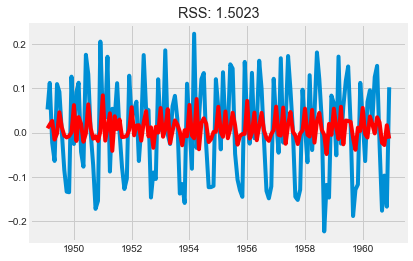

In [70]:
#MA Model
model = ARIMA(indexedDataset_logScale, order=(2,1,0))
results_MA = model.fit(disp=1)
plt.plot(datasetLogDiffShift)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues-datasetLogDiffShift['#Passengers'])**2))
print('Plotting MA Model')

C:\Users\adhar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\adhar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA Model


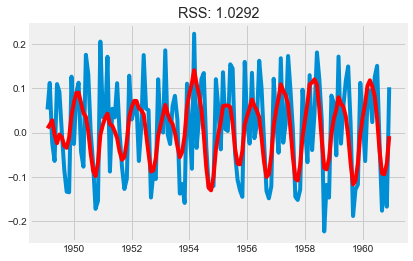

In [72]:
#MA Model
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=1)
plt.plot(datasetLogDiffShift)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogDiffShift['#Passengers'])**2))
print('Plotting MA Model')

In [73]:
results_ARIMA.fittedvalues

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
                ...   
1960-08-01   -0.041176
1960-09-01   -0.092350
1960-10-01   -0.094013
1960-11-01   -0.069924
1960-12-01   -0.008127
Length: 143, dtype: float64

In [75]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [76]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [80]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['#Passengers'].iloc[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

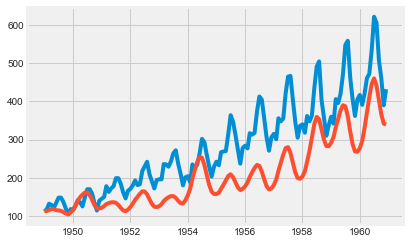

In [81]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [82]:
indexedDataset_logScale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


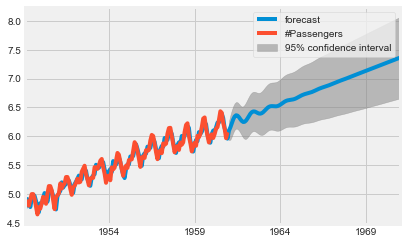

In [84]:
results_ARIMA.plot_predict(1,264)
x = results_ARIMA.forecast(steps=120)
#for next 10 years

In [85]:
x[1]

array([0.08384711, 0.10749461, 0.11568693, 0.11702774, 0.11703495,
       0.11744016, 0.11762249, 0.11778712, 0.12024161, 0.12736039,
       0.13870955, 0.15118787, 0.16157807, 0.16834388, 0.17177322,
       0.17311975, 0.17358725, 0.17385452, 0.1743021 , 0.17543324,
       0.17788139, 0.18195713, 0.18726208, 0.19283383, 0.19769234,
       0.20130629, 0.20369045, 0.20519822, 0.20625258, 0.20720988,
       0.2083696 , 0.21000316, 0.21229733, 0.21524467, 0.21860167,
       0.22198244, 0.22503052, 0.22755282, 0.22954794, 0.23114785,
       0.23253812, 0.23390521, 0.23541297, 0.23718298, 0.23926524,
       0.24161524, 0.24410356, 0.24656342, 0.24885241, 0.25089614,
       0.25269718, 0.25431613, 0.25584297, 0.25737213, 0.25898374,
       0.26072834, 0.26261532, 0.26461073, 0.26664882, 0.26865464,
       0.27056831, 0.27236079, 0.27403684, 0.27562756, 0.27717812,
       0.27873509, 0.28033573, 0.282     , 0.28372664, 0.28549492,
       0.28727192, 0.28902326, 0.29072318, 0.29236064, 0.29394